## **Linear Regression**

This concept consists in creating a relationship between labeled data. The inputs are named **'features'** and they represent the variables that can be measured. Based on previous measurements we can determine multiple sets defined as (x, y).
For the linear regression, we can obtain a function $f(x) = \hat{y}$ that aproximates an infinity of points. This function is usually is defined as: $$ f(x) = wx + b, $$ where w and b are the parameters that need to be found in order to use the model for predictions. The natural question is how to compute the most optimal parameters that we want to use in our model. 

First, we have to identify what function determines the optimality of our model. For this we can define the cost function: $$ J_{w,b} = \frac{1}{N}\sum_{i=1}^{N}(\hat{y_i}-y_i)^2 = \frac{1}{N}\sum_{i=1}^{N}(f(x_i)-y_i)^2 = \frac{1}{N}\sum_{i=1}^{N}(wx_i+b-y_i)^2 $$
In literature, this function is name **'Mean Squared Error' (MSE)**. To continue the question logic, we need to determine the optimal parameters with regards to the defined cost function. In order to do that, we compute the partial derivatives for the cost function and we set them to 0. For this case, we place our parameters where the minimum of the function is, and so the regression problem turns into an optimization one. This method is named **'Analythic Metod'**

$$ \frac{dJ}{dw} = \frac{2}{N}\sum_{i=1}^{N}(wx_i^2+x_i(b-y_i)) = 0,$$
$$ \frac{dJ}{db} = \frac{2}{N}\sum_{i=1}^{N}(b+wx_i-y_i) = 0.$$

Solving the system we obtain the following result: $$\begin{bmatrix} w \\ b \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^{N}x_i^2 && \sum_{i=1}^{N}x_i\\\sum_{i=1}^{N}x_i && N\end{bmatrix}^{-1} \begin{bmatrix} \sum_{i=1}^{N}x_iy_i\\\sum_{i=1}^{N}y_i \end{bmatrix}$$

We can see that in the calculation we must compute the inverse for an matrix. This can result in an issue, and also for a bigger model, the inverse calculation can be extremly difficult to be computed.


## **Example of Analythic Method**

For this example we take as input the number of hours studied and we want to predict the grade that should be obtained. Keep in mind that a supervised model is based on labeled data, so in order to obtain a model we need pairs of (x, y). Below we can see the data that is given:

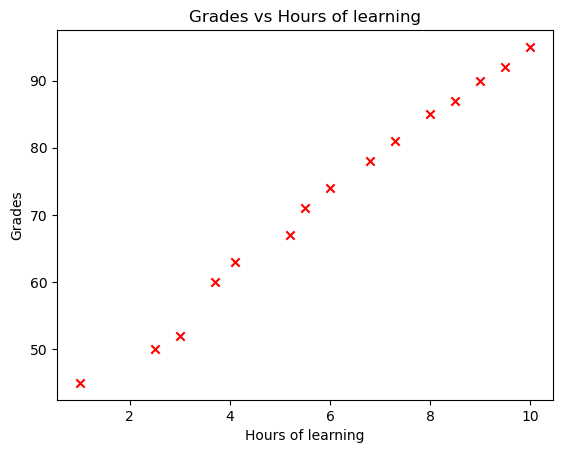

In [262]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2.5, 3, 3.7, 4.1, 5.2, 5.5, 6, 6.8, 7.3, 8, 8.5, 9, 9.5, 10])
y = np.array([45, 50, 52, 60, 63, 67, 71, 74, 78, 81, 85, 87, 90, 92, 95])

plt.scatter(x, y, color="red", marker = "x")
plt.title("Grades vs Hours of learning")
plt.xlabel("Hours of learning")
plt.ylabel("Grades")
plt.show()

As described above, we can compute the parameters by solving the linear system. The function below take as input the (x, y) pairs and returns the parameters w and b.

In [264]:
def compute_params(x, y):
    A = np.array([[np.sum(x**2), np.sum(x)],[np.sum(x), x.size]])    
    b = np.array([[np.sum(x * y)],[np.sum(y)]])
    params = np.linalg.solve(A, b)
    return params

After we compute the parameters we have the model and also we can compute the prediction based on the orginal input (number of hours learning)

In [266]:
params = compute_params(x,y)
w = params[0]
b = params[1]
y_hat = w * x + b

The visualisation of the results is depincted below

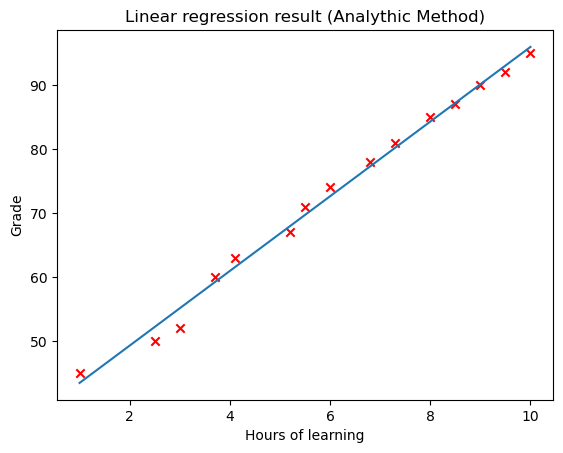

In [268]:
plt.scatter(x, y, color = "red", marker = "x")
plt.plot(x, y_hat)
plt.title("Linear regression result (Analythic Method)")
plt.xlabel("Hours of learning")
plt.ylabel("Grade")
plt.show()

## **Gradient Descent**

This is a well-known method that is used in machine learning. We saw that the **Analythic Method** had to resolve a linear system. In practice when we compute the linear regression we usually take more **features** in consideration, so with this we increase the order of the linear system. The bigger the system the harder is to compute the exact solution for the model, and in some cases the inverse does not exist. The **Gradient Descent Method** solves this issues. This is a numerical method that takes an initial guess and looks around to see where it should go in order to optimize our parameters.

The concept is simple. At the initial guess we compute the partial derivatives of the cost funtion with regards to the specified parameters **w** and **b**. After that we update our parameters using the following rules: $$ w = w - \alpha \frac{dJ}{dw}, $$ $$ b = b - \alpha \frac{dJ}{db}. $$

Following the calculations is equalt to look around and determine the direction in which you want to go (to the minimum). For a more advanced cost function we can have multimple minima and based on the initial guess we can converge to one or the other. Also another observation is that the parameter $\alpha$ is the **'Learning Rate'** which we will see how affects the algorithm.

The stopping conditions that we can use are:
1. partial derivatives are 0 (we are at the local minimum)
2. computed error is lower than a specified threshold
3. fixed number of iterations

## **Example of Gradient Descent**

Below is the implementation for the cost function, the calculation of the partial derivatives and also the gradient descent algorithm.

In [270]:
def compute_cost(x, y, w, b):
    y_hat = w * x + b
    J = np.sum((y_hat-y)**2)/x.size
    return J

def compute_partial_derivatives(x, y, w, b):
    dJ_dw = 2*(w*np.sum(x**2)+b*np.sum(x)-np.sum(x*y))/x.size
    dJ_db = 2*b+2*(w*np.sum(x)-np.sum(y))/x.size
    return dJ_dw, dJ_db

def gradient_descent(x, y, w_init, b_init, alpha, iterations):
    history = []
    w = w_init
    b = b_init
    for iteration in range(1, iterations+1):
        J = compute_cost(x, y, w, b)
        history.append(J)
        dJ_dw, dJ_db = compute_partial_derivatives(x, y, w, b)
        w = w - alpha*dJ_dw
        b = b - alpha*dJ_db
    return w, b, history

In order to better understand the effect of the learning rate we test the parameter calculation with different rates and estimate the output.

In [272]:
w_1, b_1, history_1 = gradient_descent(x, y, 1, 1, 0.001, 500)
w_2, b_2, history_2 = gradient_descent(x, y, 1, 1, 0.01, 500)
w_3, b_3, history_3 = gradient_descent(x, y, 1, 1, 0.03, 500)

y_hat_1 = w_1*x+b_1
y_hat_2 = w_2*x+b_2
y_hat_3 = w_3*x+b_3

After we compute the estimations, the results are represented in the figure down below.

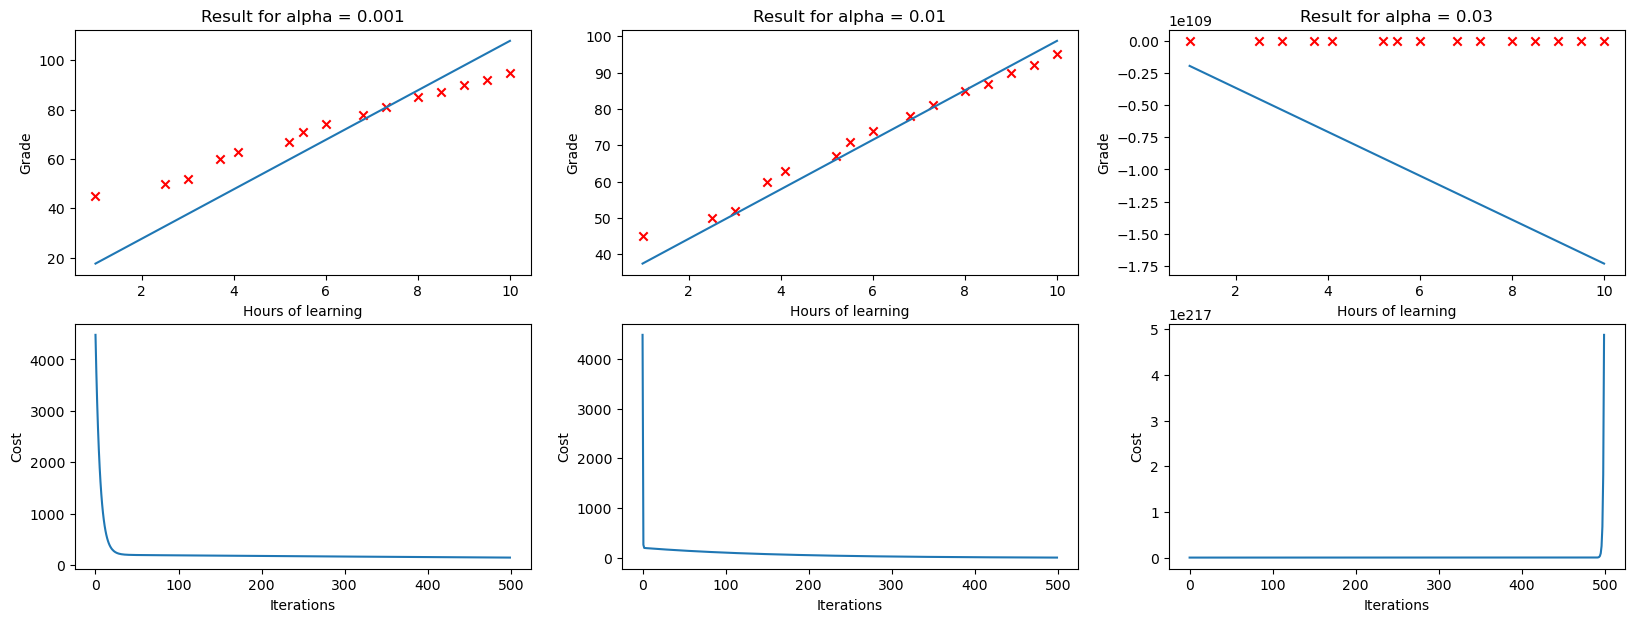

In [274]:
figs, axs = plt.subplots(2,3, figsize = (20,7))
axs[0, 0].plot(x, y_hat_1)
axs[0, 0].scatter(x, y, color = "red", marker = "x")
axs[0, 0].set_title("Result for alpha = 0.001")
axs[0, 0].set_xlabel("Hours of learning")
axs[0, 0].set_ylabel("Grade")

axs[0, 1].plot(x, y_hat_2)
axs[0, 1].scatter(x, y, color = "red", marker = "x")
axs[0, 1].set_title("Result for alpha = 0.01")
axs[0, 1].set_xlabel("Hours of learning")
axs[0, 1].set_ylabel("Grade")

axs[0, 2].plot(x, y_hat_3)
axs[0, 2].scatter(x, y, color = "red", marker = "x")
axs[0, 2].set_title("Result for alpha = 0.03")
axs[0, 2].set_xlabel("Hours of learning")
axs[0, 2].set_ylabel("Grade")

axs[1, 0].plot(history_1)
axs[1, 0].set_xlabel("Iterations")
axs[1, 0].set_ylabel("Cost")

axs[1, 1].plot(history_2)
axs[1, 1].set_xlabel("Iterations")
axs[1, 1].set_ylabel("Cost")

axs[1, 2].plot(history_3)
axs[1, 2].set_xlabel("Iterations")
axs[1, 2].set_ylabel("Cost")

plt.show()

We can conclude that if we use a small learning rate we should increase the iterations because we approach the minimum slowly. For values that are too high we might bounce from the minimum point and never converge to a solution.

## **Multiple linear regression**

This chapter shows what multiple linear regression means and how it can be implemented.
Multiple linear regression is the classic linear regression but uses more then one feature to make a prediction. The form that is used is the following: $$ f_{wb} = w_1x_1 + w_2x_2 + w_3x_3 + \dots + w_nx_n + b = \vec{w} \cdot \vec{x} + b, $$
$$ \vec{w} = \begin{bmatrix} w_1 && w_2 && w_3 && \cdots && w_n \end{bmatrix}, $$
$$ \vec{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n \end{bmatrix}. $$
As we can see, the form that is given looks like the classic one. For the parameters optimization, applying gradient descent is exactly the same, but we have to keep in mind that for this form we are working with vectors.

## **Feature Scaling**

In case of machine learning this subject is fundamental. Let's think about our case, linear regression. If we have multiple features that are ranging in toatally different scales. For example if we what to estimate the price of a house based on the number of bedrooms and size, we can see a range of $0<x_1<5$ for the first feature and $300<x_2<2000$ for the second feature. Because of this range, the countour of the cost function would tell us that with a small change of a parameter(in this case $x_1$), the estimation changes alot, and also to see a change in estimation we have to vary by alot the other feature(in this case $x_2$). 

To help the algorithm find easier the solution for our optimization problem we have to scale the features first. For that we have multiple solutions:
1. Divide all the features with the maximum value (for $x_1$ we divide with 5 and for $x_2$ we divide with 2000)
2. Scale with mean normalization (compute the mean for each feature, subtract it from all the values and divide with the maximum value - minimum value)
3. Z-score normalization (compute the mean for each feature, subtract it from all the values and divide with the standard deviation)

For feature scaling we can use many other methods, but the goal should be to make the features range between -1 and 1, but this goal is lose. If we have the range (-3, 3) we don't really need to make a rescale. The rescaling problem should be approached when working with large intervals like (-100, 100) or small intervals like (-0.001, 0.001).

## **Example of Multiple Linear Regression**

Below is given a dataset that has as features the size of a house measured in feet squared and the number of bedrooms. For the target (output) we consider the price of the house. 

In [276]:
X = np.array([[850, 2],[900, 2],[1200, 3],[1500, 3],[1700, 4],[2000, 4],[2200, 4],[2500, 5],[2700, 5],[3000, 5]])
y = np.array([180, 195, 240, 275, 310, 350, 370, 400, 430, 460])

As discussed earlier, in order for the algorithm to run well we need to scale the features as close as we can to the (-1, 1) range. In this case we use **mean normalization**

In [278]:
def mean_normalization(X):
    average = np.average(X)
    X_min = np.min(X)
    X_max = np.max(X)
    X_scaled = (X - average)/(X_max - X_min)
    return X_scaled

In the following picture we can see how the points look after the normalization. The two figures look almost the same but the now the scales are ranging from (0, 0.6) for $x_1$ and (-0.3094,-0.3082) for $x_2$

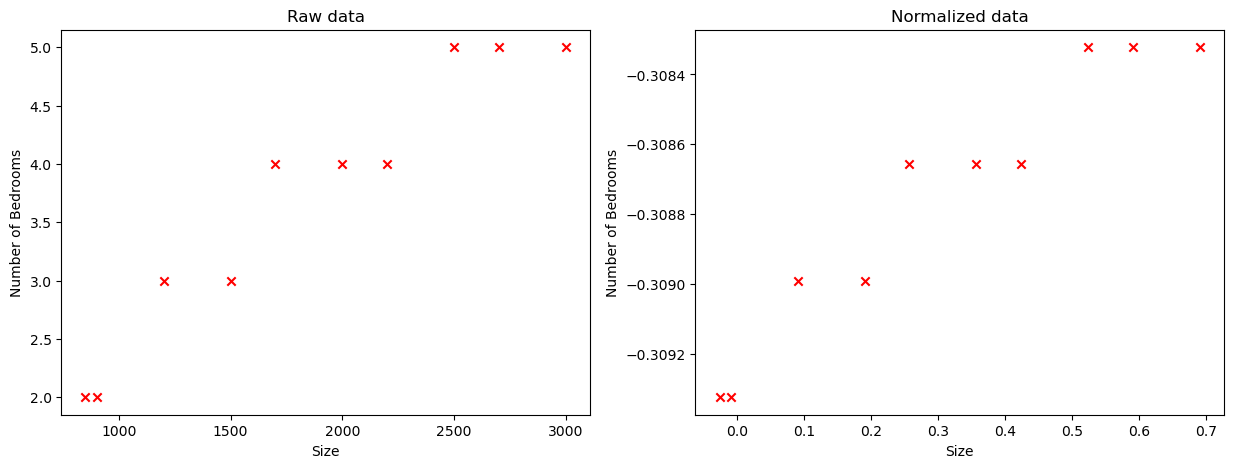

In [280]:
X_scaled = mean_normalization(X)
figs, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], color = "red", marker = "x")
axs[0].set_title("Raw data")
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Number of Bedrooms")

axs[1].scatter(X_scaled[:,0], X_scaled[:,1], color = "red", marker = "x")
axs[1].set_title("Normalized data")
axs[1].set_xlabel("Size")
axs[1].set_ylabel("Number of Bedrooms")

plt.show()

In the same manner as the simple linear regression, we compute the cost, the partial derivatives and also the update formulas for the parameters. The only thing that is changed is the fact that here we work with vectors not only with scalars.

In [282]:
def compute_cost(X, y, w, b):
    y_hat = np.dot(X, w) + b
    J = np.sum((y_hat-y)**2)/y.size
    return J

def compute_partial_derivatives(X, y, w, b):
    m = y.size
    y_hat = np.dot(X, w) + b
    dJ_dw = 2/m * np.dot(X.T, (y_hat-y))
    dJ_db = 2/m * np.sum(y_hat - y)
    return dJ_dw, dJ_db

def gradient_descent(X, y, w_init, b_init, alpha, iterations):
    history = []
    w = w_init
    b = b_init
    for iteration in range(iterations):
        J = compute_cost(X, y, w, b)
        history.append(J)
        dJ_dw, dJ_db = compute_partial_derivatives(X, y, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
    return w, b, history

After we run the algorithm, we obtain the parameters and based on them we can predict the price. Below is represented the evolution of price with regards to size and also to the number of bedrooms. The last picture depicts the evolution of the cost function over time. 

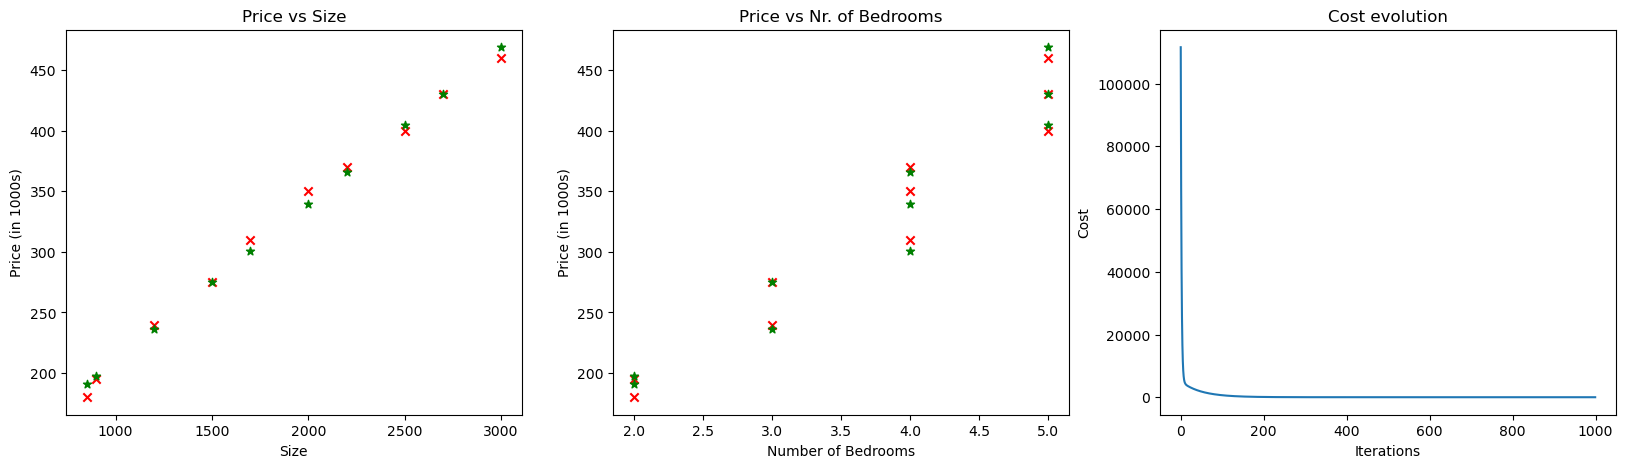

In [284]:
w, b, history = gradient_descent(X_scaled, y,[0, 0], 0, 0.1, 1000)
y_hat = np.dot(X_scaled, w) + b

figs, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].scatter(X[:,0], y, color = "red", marker = "x")
axs[0].scatter(X[:,0], y_hat, color = "green", marker = "*")
axs[0].set_title("Price vs Size")
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Price (in 1000s)")

axs[1].scatter(X[:,1], y, color = "red", marker = "x")
axs[1].scatter(X[:,1], y_hat, color = "green", marker = "*")
axs[1].set_title("Price vs Nr. of Bedrooms")
axs[1].set_xlabel("Number of Bedrooms")
axs[1].set_ylabel("Price (in 1000s)")

axs[2].plot(history)
axs[2].set_title("Cost evolution")
axs[2].set_xlabel("Iterations")
axs[2].set_ylabel("Cost")
plt.show()

## **References**

This notebook is made with the scope of better understanding machine learning and it is inspired from the **'Machine Learning Specialization'** offered by Andrew Ng-Stanford-DeepLearning.AI